In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# imports best practice sklearn
import sklearn
from sklearn import set_config

# transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

# pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.datasets import fetch_california_housing


# model selection e hiperparameters optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold

from sklearn.metrics import accuracy_score
from scipy.spatial import distance
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from sklearn.datasets import fetch_california_housing
from sklearn.impute import KNNImputer
import random

In [ ]:
df_sample = pd.read_csv("/content/drive/MyDrive/TFM/clusters/df_sample.csv")

In [ ]:
df_sample.set_index(['pk_cid'], inplace=True)

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 1087455 to 1083579
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          15000 non-null  int64  
 1   region_code  15000 non-null  int64  
 2   salary       15000 non-null  float64
 3   segment      15000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 585.9 KB


In [ ]:
def plot_euclidean_distance():

# instanciamos la figure y el axes
 fig = plt.figure(figsize = (10, 10))
 ax = fig.add_subplot(111)
 # creamos una espacio cartesiona
 lims = (-10, 10)
 alpha = 0.5
 ax.set_xlim(lims)
 ax.set_ylim(lims)
 # pintamos lineas horizontales y verticales
 ax.vlines(0, -10, 10, linestyles = "--", alpha = alpha)
 ax.hlines(0, -10, 10, linestyles = "--", alpha = alpha)
 # pintamos los dos catetos y la hipotenusa
 ax.plot([0, 5], [0, 5], alpha = alpha, color = "red", lw = 2) # hipotenusa
 ax.text(2, 3.5, s = "d", fontsize = 8, color = "red")
 ax.plot([0, 5], [0, 0], alpha = alpha, color = "blue", lw = 2) # cateto azul
 ax.text(1.5, -1, s = "x2 - x1", fontsize = 8, color = "blue")
 ax.plot([5, 5], [5, 0], alpha = alpha, color = "green", lw = 2) # cateto verde
 # origen
 ax.scatter([0, 0], [0, 0], alpha = alpha, color = "black", lw = 2)
 ax.text(-1, -1, s = "(x1, y1)", fontsize = 8, color = "black")
 # punto 2
 ax.scatter([0, 5], [0, 5], alpha = alpha, color = "black", lw = 2)
 ax.text(5.5, 5.5, s = "(x2, y2)", fontsize = 8, color = "black")
 # punto en el eje x
 ax.scatter([5, 0], [0, 0], alpha = alpha, color = "black", lw = 2)
 # cálculo
 ax.text(1.5, -1, s = "x2 - x1", fontsize = 8, color = "blue")
 ax.text(5.5, 2, s = "y2 - y1", fontsize = 8, color = "green")
 # creamos las listas para los ejes (-10 hasta 10)
 x_ticks = [x for x in range(-10, 11)]
 y_ticks = [y for y in range(-10, 11)]
 # enumeramos los ejes desde -10 hasta 10
 ax.set_xticks(x_ticks)
 ax.set_yticks(y_ticks)
 # ponemos el título
 fig.suptitle("Euclidean Distance Between 2 Vectors in a 2D Space")

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = scaler.fit_transform(df_sample)

In [ ]:
def calculate_distances(X, index, distance_func):  # Calculates the distances between vectors with the specified function you pass. Returns a pandas DataFrame.
    distances = distance_func(X = X)
    distances = pd.DataFrame(distances, index = index, columns = index)
    distances = round(distances, 1)
    distances.replace(to_replace = 0, value = np.nan, inplace = True)
    return distances

In [ ]:
def format_cell_based_on_target_value(value, target_value, highlight = 'background-color: yellow'): #Formats a cell based on a target_value. Returns a background color or pass.
    if value == None:
        pass
    elif value == target_value:
        return highlight
    else:
        return ""


In [ ]:
COLOR = "#2a9d8f"
COLOR_MAX = "#D8E4FF"

In [ ]:
distances = calculate_distances(
    X = df_scaled,
    index = df_scaled.index,
    distance_func = euclidean_distances)
distances.style.highlight_min(axis = 1, color = COLOR)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sse = {}

In [ ]:
for k in range(2, 15):
    print(f"Fitting pipe with {k} clusters")
    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled)
    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 3 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 4 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 5 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 6 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 7 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 8 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 9 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 10 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 11 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 12 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 13 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting pipe with 14 clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


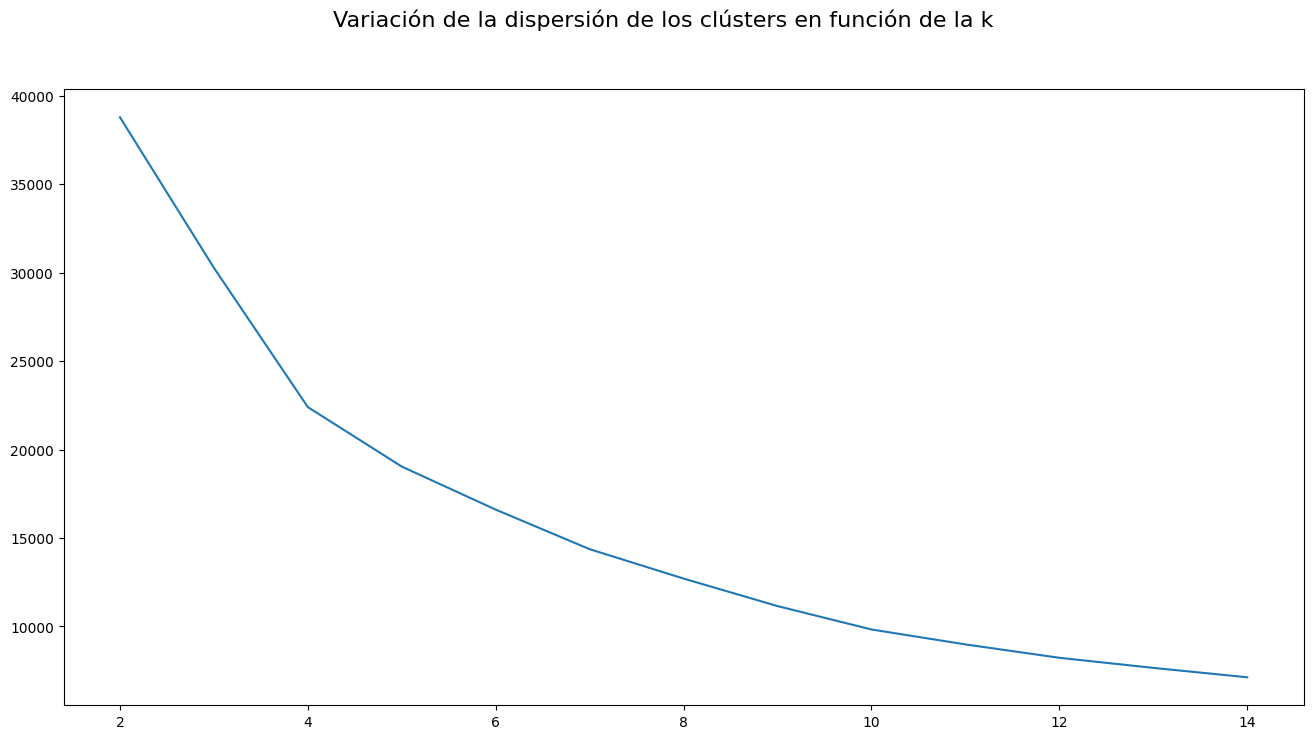

In [ ]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()
x_values = list(sse.keys())
y_values = list(sse.values())
ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16)
plt.show()

In [ ]:
df_clustering = pd.read_csv("/content/drive/MyDrive/TFM/clusters/df_clustering.csv")

In [ ]:
df_clustering.set_index(["pk_cid"], inplace = True)

In [ ]:
knn_imputer = KNNImputer(n_neighbors = 5)
knn_imputer

KNNImputer()

In [ ]:
num_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters = num_clusters, random_state = 0)

In [ ]:
df_clustering["cluster"] = kmeans.fit_predict(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
for cluster_id in range(num_clusters):
# Filtrar el DataFrame por grupo
    cluster_data = df_clustering[df_clustering['cluster'] == cluster_id].copy()
    # Selección de columnas relevantes para la imputación
    columns_to_impute = ["age", "region_code", "salary","segment"]  # Reemplaza con las columnas relevantes
    # Crear un KNN Imputer para el grupo actual
    imputer = KNNImputer(n_neighbors=5)  # Ajusta el número de vecinos según tus necesidades

# Imputar valores faltantes para el grupo actual
#cluster_data.loc[:, columns_to_impute] = imputer.fit_transform(cluster_data.loc[:, columns_to_impute])
    cluster_data[columns_to_impute] = imputer.fit_transform(cluster_data[columns_to_impute])


# Actualizar el DataFrame original con los valores imputados
    df_clustering.loc[df_clustering['cluster'] == cluster_id, columns_to_impute] = cluster_data[columns_to_impute]

In [ ]:
df_clustering

,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month,activos_financieros,cuenta_operaciones,creditos_prestamos,cluster
pk_cid,,,,,,,,,,,,,,
657826,2,1,2,1,25,1,44,54493.38,2015,5,0,1,0,0
657986,7,1,2,1,41,1,39,100993.17,2016,2,1,3,2,0
657905,17,1,1,1,28,1,85,154059.09,2017,2,1,1,0,0
657336,17,1,2,1,28,0,38,107692.80,2019,3,0,1,0,0
658184,17,1,2,1,28,0,42,183036.72,2015,5,1,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166765,57,0,3,1,50,0,22,43912.17,2016,8,0,1,0,0
1166764,57,0,3,1,26,0,23,23334.99,2016,8,0,1,0,0
1166763,57,1,2,1,50,1,47,79247.46,2016,8,0,1,0,0


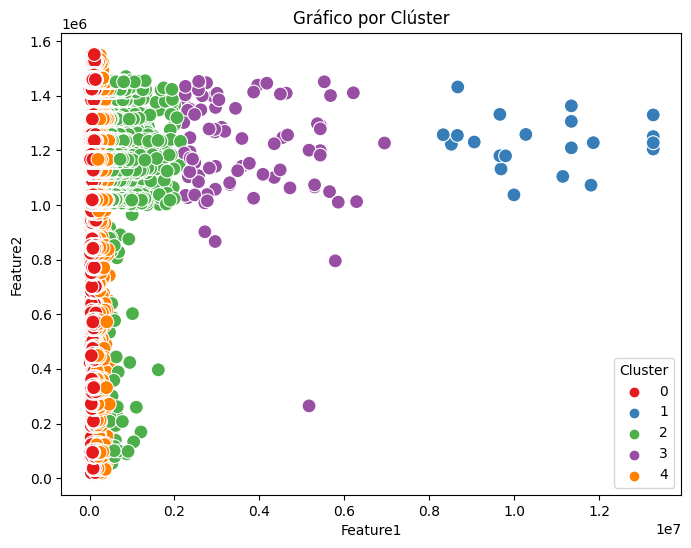

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary', y='pk_cid', hue='cluster', data = df_clustering, palette='Set1', s=100)
plt.title('Gráfico por Clúster')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
df_clustering[df_clustering["cluster"] == 1]

,entry_channel,active_customer,segment,country_id,region_code,gender,age,salary,entry_date_year,entry_date_month,activos_financieros,cuenta_operaciones,creditos_prestamos,cluster
pk_cid,,,,,,,,,,,,,,
1362782,57,0,3,1,41,0,22,11341152.48,2017,11,0,1,0,1
1329461,57,1,3,1,29,0,30,13268621.28,2017,10,0,1,0,1
1331578,57,1,3,1,28,1,23,9659263.86,2017,10,0,1,0,1
1305927,57,0,3,1,41,1,23,11341152.48,2017,9,0,1,0,1
1431895,62,0,2,1,28,1,31,8667715.11,2018,8,0,1,0,1
1072429,57,0,3,1,28,0,31,11804014.98,2015,10,0,1,0,1
1104456,57,0,3,1,28,0,27,11139895.56,2015,11,0,1,0,1
1036888,57,0,3,1,28,1,24,9990379.74,2015,7,0,1,0,1
1209096,57,0,3,1,41,1,22,11341152.48,2016,10,0,1,0,1


In [ ]:
df_clustering.to_csv("/content/drive/MyDrive/TFM/clusters/df_cluster_5_kmeans.csv")